In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms

In [2]:
fsize = 15
tsize = 18
tdir = 'in'
major = 5.0
minor = 3.0
lwidth = 0.8
lhandle = 2.0
plt.style.use('default')
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = fsize
plt.rcParams['legend.fontsize'] = fsize-5
plt.rcParams['xtick.direction'] = tdir
plt.rcParams['ytick.direction'] = tdir
plt.rcParams['xtick.major.size'] = major
plt.rcParams['xtick.minor.size'] = minor
plt.rcParams['ytick.major.size'] = 5.0
plt.rcParams['ytick.minor.size'] = 3.0
plt.rcParams['axes.linewidth'] = lwidth
plt.rcParams['legend.handlelength'] = lhandle

#make augmentation v no augmentation snr plot

In [9]:
import pandas as pd
import glob
import os
  
# merging the files
#joined_files = os.path.join("results", "station*.csv")
joined_files = "../../data/results/station*.csv"
#joined_files = "../../data/results/station*1.csv"
# A list of all joined files is returned
joined_list = glob.glob(joined_files)
  
# Finally, the files are joined
df = pd.concat(map(pd.read_csv, joined_list), ignore_index=True)
print(df)

#df=df[df.features=='all']

       Unnamed: 0                      eq_name  record_number  magnitude  \
0               0                "Coalinga-01"            329       6.36   
1               1                "Coalinga-01"            331       6.36   
2               2                "Coalinga-05"            407       5.77   
3               3                "Coalinga-01"            336       6.36   
4               4                "Coalinga-01"            338       6.36   
...           ...                          ...            ...        ...   
82735        6211               "San Fernando"             80       6.61   
82736        6212               "San Fernando"             71       6.61   
82737        6213               "San Fernando"             80       6.61   
82738        6214   "El Mayor-Cucapah_ Mexico"           8522       7.20   
82739        6215               "San Fernando"             80       6.61   

          mechanism   Rrup  noise_lev marker    color          label  \
0           Rev

In [4]:
df[df.augment==False].threshold.mean()

0.22755982518521728

In [5]:
len(df[(df.augment==True) &(df.marker=='o')]) /len(df[df.augment==True])

0.879705787341898

In [7]:
df.features.unique()

array(['psd_t', 'psd', 'time'], dtype=object)

/tmp/ipykernel_12608/1381986097.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp=tmp[df.noise_lev==noise]


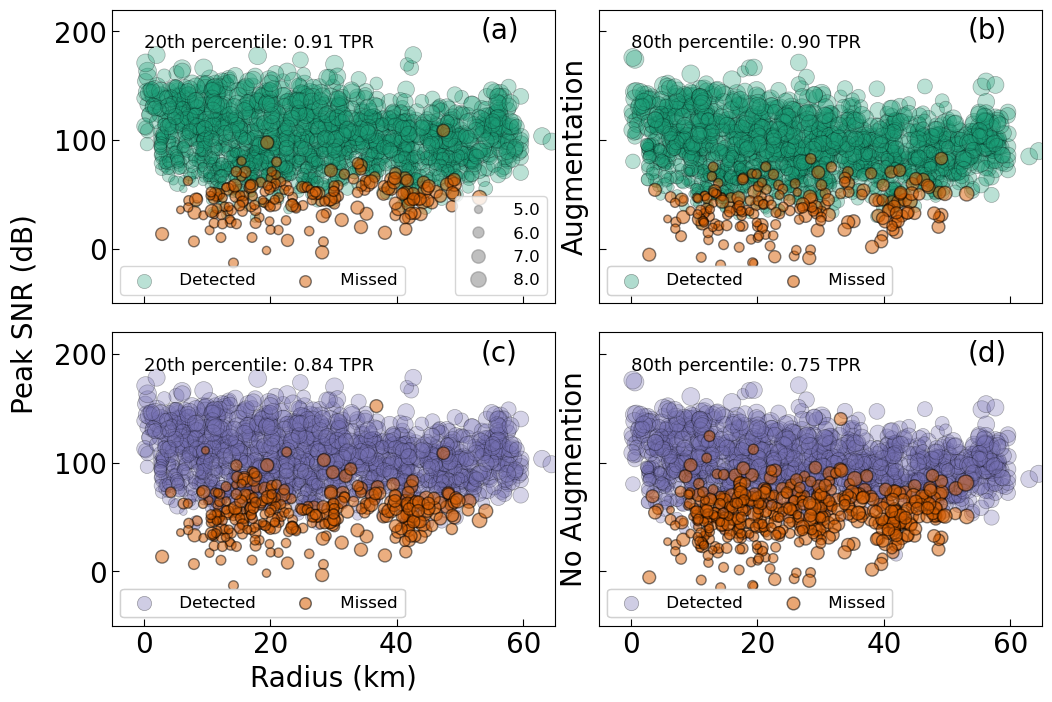

In [19]:
df=df[df.features=='psd_t']
#results_df=pd.DataFrame(results)
#results_df=results_df[results_df[5]=='5']

colors=['#1b9e77','#7570b3','#d95f02']#['#e41a1c','#377eb8','#4daf4a']
#colors.reverse()
#fig,ax=plt.subplots(2,2, figsize=(8,8),sharex=True, sharey=True)
#power point
fig,ax=plt.subplots(2,2, figsize=(12,8),sharex=True, sharey=True)

fig_lab=['a','b','c','d']
for i,(aug, color, title) in enumerate(zip([True,False],[colors[0],colors[1]],['Augmention','No Augmention'])):
    for j,noise in enumerate([20,80]):
        tmp=df[df.augment==aug]
        tmp=tmp[df.noise_lev==noise]
        #PLOT TP
        tp=tmp[(tmp['marker']=='o')]
        sizes=50*(tp['magnitude']-df['magnitude'].min())+30



        #fig,ax=plt.subplots(figsize=(7,4))
        #plt.grid(axis='y', color='grey', linestyle=':')
        scatter=ax[i,j].scatter(x=tp['Rrup'], y=tp['snr_max'], s=sizes, alpha=.3, color=color, ec='black', linewidth=.5,label=' Detected')

        fn=tmp[(tmp['marker']=='x')]
        sizes=50*(fn['magnitude']-df['magnitude'].min())+30
        ####
        #sizes=150*(tmp[2]-tmp[2].min())+30
        scatter=ax[i,j].scatter(x=fn['Rrup'], y=fn['snr_max'], s=sizes, alpha=.5, color=colors[2], ec='black', label=' Missed')
        #ax.scatter(x=tmp[4], y=tmp[9], s=5, color='#d95f02', label='P wave')
        #ax.scatter(x=tmp[4], y=tmp[9], s=5, color='#1b9e77', label='S wave')
        #ax[i,j].set_xlabel('Rrup (km)')
        #ax[i,j].set_ylabel('Peak SNR (dB)')
        
        ax[i,j].set_ylim([-50,220])
        ax[i,j].set_xlim([-5,65])

        tpr=len(tp)/(len(tp)+len(fn))
        tpr="{:.2f}".format(tpr)
        legend1=ax[i,j].legend(loc='lower left', ncol=2) 
        ax[i,j].add_artist(legend1)
        
        trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
        ax[i,j].text(.8, 1.0, '(%s)' %fig_lab[int(2*i+j)], transform=ax[i,j].transAxes + trans,
            fontsize='medium', verticalalignment='top')
        
        
        # Produce a legend for the ranking (colors). Even though there are 40 different
        # rankings, we only want to show 5 of them in the legend.
        #legend1 = ax.legend(*scatter.legend_elements(num=3),
        #                   loc="upper left")
        #ax.add_artist(legend1)

        # Produce a legend for the price (sizes). Because we want to show the prices
        # in dollars, we use the *func* argument to supply the inverse of the function
        # used to calculate the sizes from above. The *fmt* ensures to show the price
        # in dollars. Note how we target at 5 elements here, but obtain only 4 in the
        # created legend due to the automatic round prices that are chosen for us.
        ax[i,j].text(0,185,'%sth percentile: %s TPR' %(noise,tpr), fontsize=13)
        #ax[i,j].text(0,190,tpr, fontsize=12)
kw = dict(prop="sizes", num=4, color='grey', fmt=" {x:.1f}", \
          func=lambda s: (s-30)/30 + df['magnitude'].min())
legend2 = ax[0,0].legend(*scatter.legend_elements(**kw), \
                    loc="lower right") #, title="Magnitude"
        
        

#plt.savefig('time_of_detect3.png', dpi=500)
#fig.text(0.5, 0.04, 'Radius (km)', ha='center')
fig.text(0.04, 0.5, 'Peak SNR (dB)', va='center', rotation='vertical')
ax[0,0].set_ylabel('Augmentation')
ax[0,0].yaxis.set_label_position("right")
ax[1,0].set_ylabel('No Augmention')
ax[1,0].yaxis.set_label_position("right")
ax[1,0].set_xlabel('Radius (km)')



#fig.tight_layout()
plt.subplots_adjust(wspace=.1, hspace=.1)

#plt.show()
#plt.savefig('figs/augmentation.png',dpi=300)
plt.savefig('figs/augmentation_pp.png',dpi=200)

In [7]:
tmp

,Unnamed: 0,eq_name,record_number,magnitude,mechanism,Rrup,noise_lev,marker,color,label,threshold,snr_max,augment,run,features,first_t
1801,1801,"""Coalinga-05""",407,5.77,Reverse,8.46,95,o,#377eb8,NaN,0.108799,52.263502,False,1,psd_t,1.4
1803,1803,"""Coalinga-01""",338,6.36,Reverse,29.48,95,o,#377eb8,NaN,0.108799,77.210448,False,1,psd_t,5.4
1821,1821,"""Coalinga-01""",350,6.36,Reverse,37.02,95,o,#377eb8,NaN,0.108799,67.772972,False,1,psd_t,5.4
1828,1828,"""Coalinga-01""",331,6.36,Reverse,48.70,95,o,#377eb8,NaN,0.108799,60.444525,False,1,psd_t,4.2
1832,1832,"""Coalinga-01""",324,6.36,Reverse,43.68,95,o,#377eb8,NaN,0.108799,67.934645,False,1,psd_t,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71967,2205,"""Chi-Chi_ Taiwan-02""",2238,5.90,Reverse,47.24,95,o,#377eb8,NaN,0.262618,49.918861,False,9,psd_t,24.6
71990,2228,"""Chi-Chi_ Taiwan-02""",2421,5.90,Reverse,44.71,95,o,#377eb8,NaN,0.262618,59.413257,False,9,psd_t,4.2
72003,2241,"""Chi-Chi_ Taiwan-02""",2381,5.90,Reverse,42.77,95,o,#377eb8,NaN,0.262618,48.651077,False,9,psd_t,22.0
72008,2246,"""Chi-Chi_ Taiwan-02""",2415,5.90,Reverse,38.78,95,o,#377eb8,NaN,0.262618,38.846410,False,9,psd_t,4.4


# make a PP figure

In [12]:
fsize = 20
tsize = 20
tdir = 'in'
major = 5.0
minor = 3.0
lwidth = 0.8
lhandle = 2.0
plt.style.use('default')
plt.rcParams['text.usetex'] = False
plt.rcParams['font.size'] = fsize
plt.rcParams['legend.fontsize'] = fsize-8
plt.rcParams['xtick.direction'] = tdir
plt.rcParams['ytick.direction'] = tdir
plt.rcParams['xtick.major.size'] = major
plt.rcParams['xtick.minor.size'] = minor
plt.rcParams['ytick.major.size'] = 5.0
plt.rcParams['ytick.minor.size'] = 3.0
plt.rcParams['axes.linewidth'] = lwidth
plt.rcParams['legend.handlelength'] = lhandle

In [46]:
df2_wavelet.first_t.mean()

15.92841020725388

In [48]:
df2_time.first_t.mean()

16.476991872509952

In [ ]:
# find elements in df1 that are not in df2
df_1notin2 = df1[~(df1['Name'].isin(df2['Name']) & df1['Age'].isin(df2['Age']))].reset_index(drop=True)

In [ ]:
df2_psd.record_number.to_list()

In [97]:
ALL=df2_all[~(df2_all['record_number'].isin(df2_psd.record_number.to_list()))]
PSD=df2_psd[~(df2_psd['record_number'].isin(df2_all.record_number.to_list()))]

In [91]:
PSD=df2_psd[~(df2_psd['record_number'].isin(df2_wavelet.record_number.to_list()))]
WL=df2_wavelet[~(df2_wavelet['record_number'].isin(df2_psd.record_number.to_list()))]

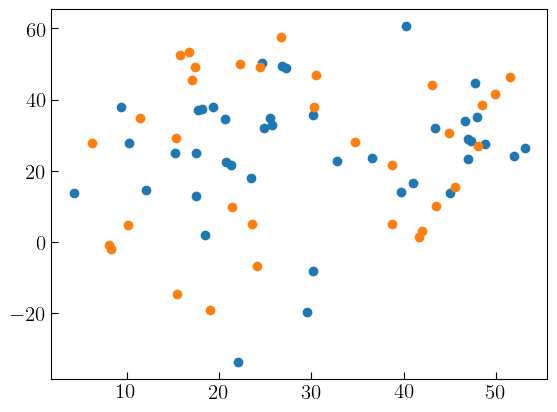

In [98]:
plt.scatter(PSD.Rrup, PSD.snr_max)
plt.scatter(ALL.Rrup, ALL.snr_max)

In [100]:
df2_psd.first_t-df2_wavelet.first_t

3021    NaN
3022    NaN
3026    NaN
3041    NaN
3042    NaN
         ..
96074   NaN
96081   NaN
96088   NaN
96095   NaN
96102   NaN
Name: first_t, Length: 3082, dtype: float64

In [101]:
df2_psd.first_t

84182    20.2
70986     4.2
93549     9.6
70601    23.8
84205     6.2
         ... 
79209    53.2
79233    17.6
79773    25.0
70653    26.0
84051    14.8
Name: first_t, Length: 1590, dtype: float64

In [102]:
df2_wavelet.first_t

86506    30.2
73198     9.4
95971    24.6
72813    23.8
86529    11.2
         ... 
54069    84.4
72865    26.0
72957    54.8
86375    14.8
54719    10.0
Name: first_t, Length: 1492, dtype: float64

In [107]:
df2_psd=df2_psd[(df2_psd['record_number'].isin(df2_wavelet.record_number.to_list()))]

In [108]:
df2_wavelet.first_t.values-df2_psd.first_t.values

ValueError: operands could not be broadcast together with shapes (1492,) (1429,) 

In [104]:
df2_psd

,Unnamed: 0,eq_name,record_number,magnitude,mechanism,Rrup,noise_lev,marker,color,label,threshold,snr_max,augment,run,features,first_t
84182,3430,"""Helena_ Montana-01""",1,6.00,strike slip,2.86,95,o,#377eb8,NaN,0.416570,112.075430,True,7,psd,20.2
70986,2722,"""Helena_ Montana-02""",2,6.00,strike slip,2.92,95,o,#377eb8,NaN,0.402893,122.316636,True,8,psd,4.2
93549,3501,"""Imperial Valley-02""",6,6.95,strike slip,6.09,95,o,#377eb8,NaN,0.396589,128.055218,True,6,psd,9.6
70601,2337,"""Northern Calif-01""",8,6.40,strike slip,44.68,95,o,#377eb8,NaN,0.402893,114.459496,True,8,psd,23.8
84205,3453,"""Imperial Valley-03""",10,5.60,strike slip,25.24,95,o,#377eb8,NaN,0.416570,92.631771,True,7,psd,6.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79209,2097,"""14383980""",8897,5.39,Reverse Oblique,23.14,95,o,#377eb8,NaN,0.411093,36.322719,True,10,psd,53.2
79233,2121,"""14383980""",8929,5.39,Reverse Oblique,21.95,95,o,#377eb8,NaN,0.411093,20.129085,True,10,psd,17.6
79773,2661,"""14383980""",8969,5.39,Reverse Oblique,33.78,95,o,#377eb8,NaN,0.411093,20.321565,True,10,psd,25.0
70653,2389,"""14151344""",9009,5.20,strike slip,14.19,95,o,#377eb8,NaN,0.402893,43.694799,True,8,psd,26.0


# Calculate increase in F1 with Aug

In [16]:
import pandas as pd
import glob
import os
  
# merging the files
joined_files = os.path.join("results", "nested*.csv")
  
# A list of all joined files is returned
joined_list = glob.glob(joined_files)
  
# Finally, the files are joined
df = pd.concat(map(pd.read_csv, joined_list), ignore_index=True)
print(df)

df=df[df.features=='all']

    Unnamed: 0  precision    recall        f1  threshold  \
0            0   0.706205  0.828397  0.762436   0.368423   
1            1   0.699129  0.694219  0.696666   0.107179   
2            2   0.711876  0.829036  0.766002   0.404809   
3            3   0.687791  0.710525  0.698973   0.140000   
4            4   0.822101  0.709936  0.761912   0.370000   
..         ...        ...       ...       ...        ...   
75           3   0.858411  0.571308  0.686033   0.136253   
76           4   0.945461  0.697328  0.802655   0.366000   
77           5   0.788137  0.545710  0.644893   0.116000   
78           6   0.969880  0.634037  0.766797   0.452000   
79           7   0.875887  0.503235  0.639214   0.210000   

                                           precisions  \
0   [0.1806158  0.18060853 0.18061174 ... 0.995525...   
1   [0.14367062 0.39254128 0.39254983 ... 0.990929...   
2   [0.14367062 0.17884501 0.17884658 ... 0.999713...   
3   [0.14367062 0.33711063 0.33715892 ... 1.      .

AttributeError: 'DataFrame' object has no attribute 'features'

In [21]:
df.groupby('augment').mean()

,Unnamed: 0,precision,recall,f1,threshold,run
augment,,,,,,
False,4.0,0.840032,0.615128,0.703551,0.142652,5.5
True,3.0,0.906482,0.732764,0.804289,0.399879,5.5
